In [11]:
import pandas as pd
import numpy as np
import welly
import matplotlib 

# import lasio

  

from scipy import integrate
from scipy import signal
from ipywidgets import interact

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
%pwd

'C:\\Users\\Thomas.Sandison\\geocomp-18\\logshape'

In [13]:
from welly import Well

w = Well.from_las('well.las')


Header section Parameter regexp=~P was not found.


In [14]:
gr = np.array(w.data['GR'])

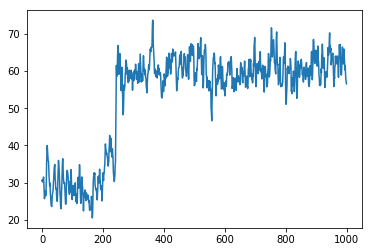

In [16]:
top = 0
base = 1000
gr_interval=gr[top:base]
plt.plot(gr_interval)
plt.show()

In [27]:
@interact(top=(0,1000,100))
def testfunc(top):
    gr_interval=gr[top:interval]
    plt.plot(gr_interval)
    plt.show()
    return


interactive(children=(IntSlider(value=500, description='top', max=1000, step=100), Output()), _dom_classes=('w…

In [29]:
@interact(top=(0,1000,100), interval =(10, 10000, 10))
def testfunc(top, interval):
    gr_interval=gr[top:top+interval]
    plt.plot(gr_interval)
    plt.show()
    return


interactive(children=(IntSlider(value=500, description='top', max=1000, step=100), IntSlider(value=5000, descr…

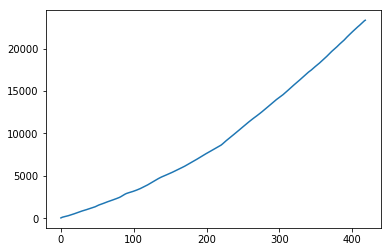

In [21]:
gr_interval
gr_interval_int=integrate.cumtrapz(gr_interval)
plt.plot(gr_interval_int)

In [17]:
gr_interval_int

23327.96

In [46]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(gr_interval, signal.ricker, widths)

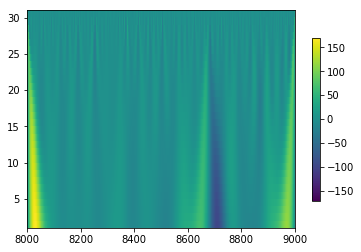

In [47]:
plt.imshow(cwtmatr, extent=[top, base, 1, 31], cmap='viridis', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar(shrink=0.75)
plt.show()
